<a href="https://colab.research.google.com/github/chemacecilia/HCD/blob/main/UTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo:**
Este ejercicio tiene como finalidad que los estudiantes entiendan el sistema de coordenadas proyectadas UTM (Universal Transverse Mercator) y cómo se transforman las coordenadas geográficas (latitud y longitud) en coordenadas UTM (en metros).





1. **Instalación de Librerías**: Usaremos la librería pyproj para realizar las transformaciones a UTM.

In [1]:
# !pip install pyproj

In [2]:
from pyproj import Proj, transform
import matplotlib.pyplot as plt

**Definir un punto en coordenadas geográficas (Latitud, Longitud)**


In [3]:
# Definir el punto en WGS84 (por ejemplo, una ubicación en Valencia)
latitude = 39.4699
longitude = -0.3763

**Crear un proyector para WGS84 (coordenadas geográficas) y UTM zona 30N**




In [4]:
proj_utm = Proj(proj='utm', zone=30, ellps='WGS84', preserve_units=False)  # UTM zona 30
proj_wgs84 = Proj(proj='latlong', datum='WGS84')  # Coordenadas geográficas

# Transformar de WGS84 a UTM
x_utm, y_utm = transform(proj_wgs84, proj_utm, longitude, latitude)
print(f"Coordenadas UTM: X = {x_utm:.2f} m, Y = {y_utm:.2f} m")

# Transformar de UTM de vuelta a WGS84
lon_wgs84, lat_wgs84 = transform(proj_utm, proj_wgs84, x_utm, y_utm)
print(f"Coordenadas Geográficas Recuperadas: Latitud = {lat_wgs84:.5f}, Longitud = {lon_wgs84:.5f}")


Coordenadas UTM: X = 725695.71 m, Y = 4372210.14 m
Coordenadas Geográficas Recuperadas: Latitud = 39.46990, Longitud = -0.37630


<ipython-input-4-f2148f3053ad>:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_utm, y_utm = transform(proj_wgs84, proj_utm, longitude, latitude)
<ipython-input-4-f2148f3053ad>:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon_wgs84, lat_wgs84 = transform(proj_utm, proj_wgs84, x_utm, y_utm)


**Visualización del punto en coordenadas UTM (sistema cartesiano)**


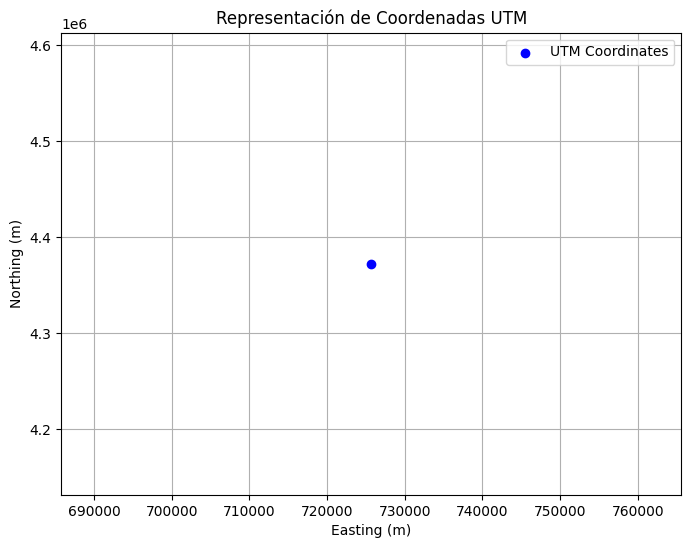

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(x_utm, y_utm, color='blue', label='UTM Coordinates', zorder=2)
plt.title("Representación de Coordenadas UTM")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.legend()
plt.grid(True)
plt.show()